# Overview

Classification is the problem of machine learning in which we try to identify to which of a set of categories a new observation belongs, on the basis of a training set of data containing observations whose category membership is known. Classification is considered an instance of supervised learning, i.e., learning where a training set of correctly identified observations is available. In this notebook, I will be implementing 4 Classification algorithms including my explaination of codes and some experiments to find out the accuracy of my models. Below are the four models that I will be implementing:

1. Pocket Algorithm
2. Quadratic Discriminant Analysis (QDA)
3. Linear Discriminant Analysis (LDA)
4. Logistic Regression

Here are some key points about these algorithms. We will review each of them in detail in next sections of the report:

- Pocket Algorithm is the extension of Perceptron algorithm where we capture the best weight vector for our dataset.

- LDA and QDA are the generative models that are probablistic. Bayes' rule is freqently applied to compute the joint distribution from the conditional probabilty.
$$
  P(T \mid X) = \frac{P(X \mid T) P(T)}{P(X)}
$$

- Logistic Regression uses a softmax function to predict the probability of the class. Input values (X) are combined linearly using weights or coefficient values to predict an output value (T). A key difference from linear regression is that the output value being modeled is a class values rather than a numeric value.


# Data

### Description

This is a dataset for "Adult Census Income" from 1994. This is a multivariate dataset consisting of 14 attributes and more than 30K samples. This is a classification problem to predict whether income exceeds $50K/yr or not based on census data.
I got this data from UCI Machine Learning repository.

Below are

Listing of attributes: 

* **income** - >50K, <=50K. 

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. { Description of fnlwgt (final weight) --> The weights on the CPS files are controlled to independent estimates of the civilian non institutional population of the US.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th,                10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-               inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. 
- capital-loss: continuous. 
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,                       Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,                     Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua,                     Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### Source of Data

Ron Kohavi, _"Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid"_, Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 
1996, http://robotics.stanford.edu/~ronnyk/nbtree.pdf

Dataset Source : https://archive.ics.uci.edu/ml/datasets/Adult

In [650]:
#Importing the Libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

dataset = pd.read_csv("adult.csv")

In [347]:
#Verifying the shape of data
dataset.shape

(32561, 15)

In [192]:
#Listing the columns of the dataset
dataset.columns.values

array(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital status', 'occupation', 'relationship', 'race', 'sex',
       'captial-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'], dtype=object)

In [627]:
#Checking if there is any missing attribute in the entire dataset
np.any(dataset.isnull())

False

In [422]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [424]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
captial-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

There seem to be missing values in the data and the fields are filled with '?'. We will need to remove those rows so that Machine Learning Algorithms can be applied properly on such datasets.

**The income that will be predicted as part of Classification problem currently exists as <=50K or >50K. We can convert this to a binary classifier (-1,1) where -1 means income <= 50K and 1 means income > 50K**

In [651]:
#Replace '?' with NaN and then use dropna() method to delete all such rows
dataset = dataset.replace(' ?', np.NaN)
dataset = dataset.dropna()

dataset['income'] = dataset['income'].map({' <=50K' : 0, ' >50K' : 1})

Income has been successfully converted to a binary classifier (0,1), which we will use to plot and visualise the data in next step.

In [4]:
#Separating dependent variable and independent variables for plotting
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

### Plots for Understanding and Analysis


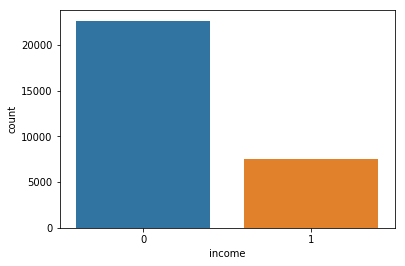

In [432]:
#Countplot of income
sns.countplot(dataset['income'])

Above plot shows that out of the 30K samples in our dataset, we have over 20K people whose income is less than or equal to 50K where as count of people with income over 50K is somewhere between 5K to 10K.

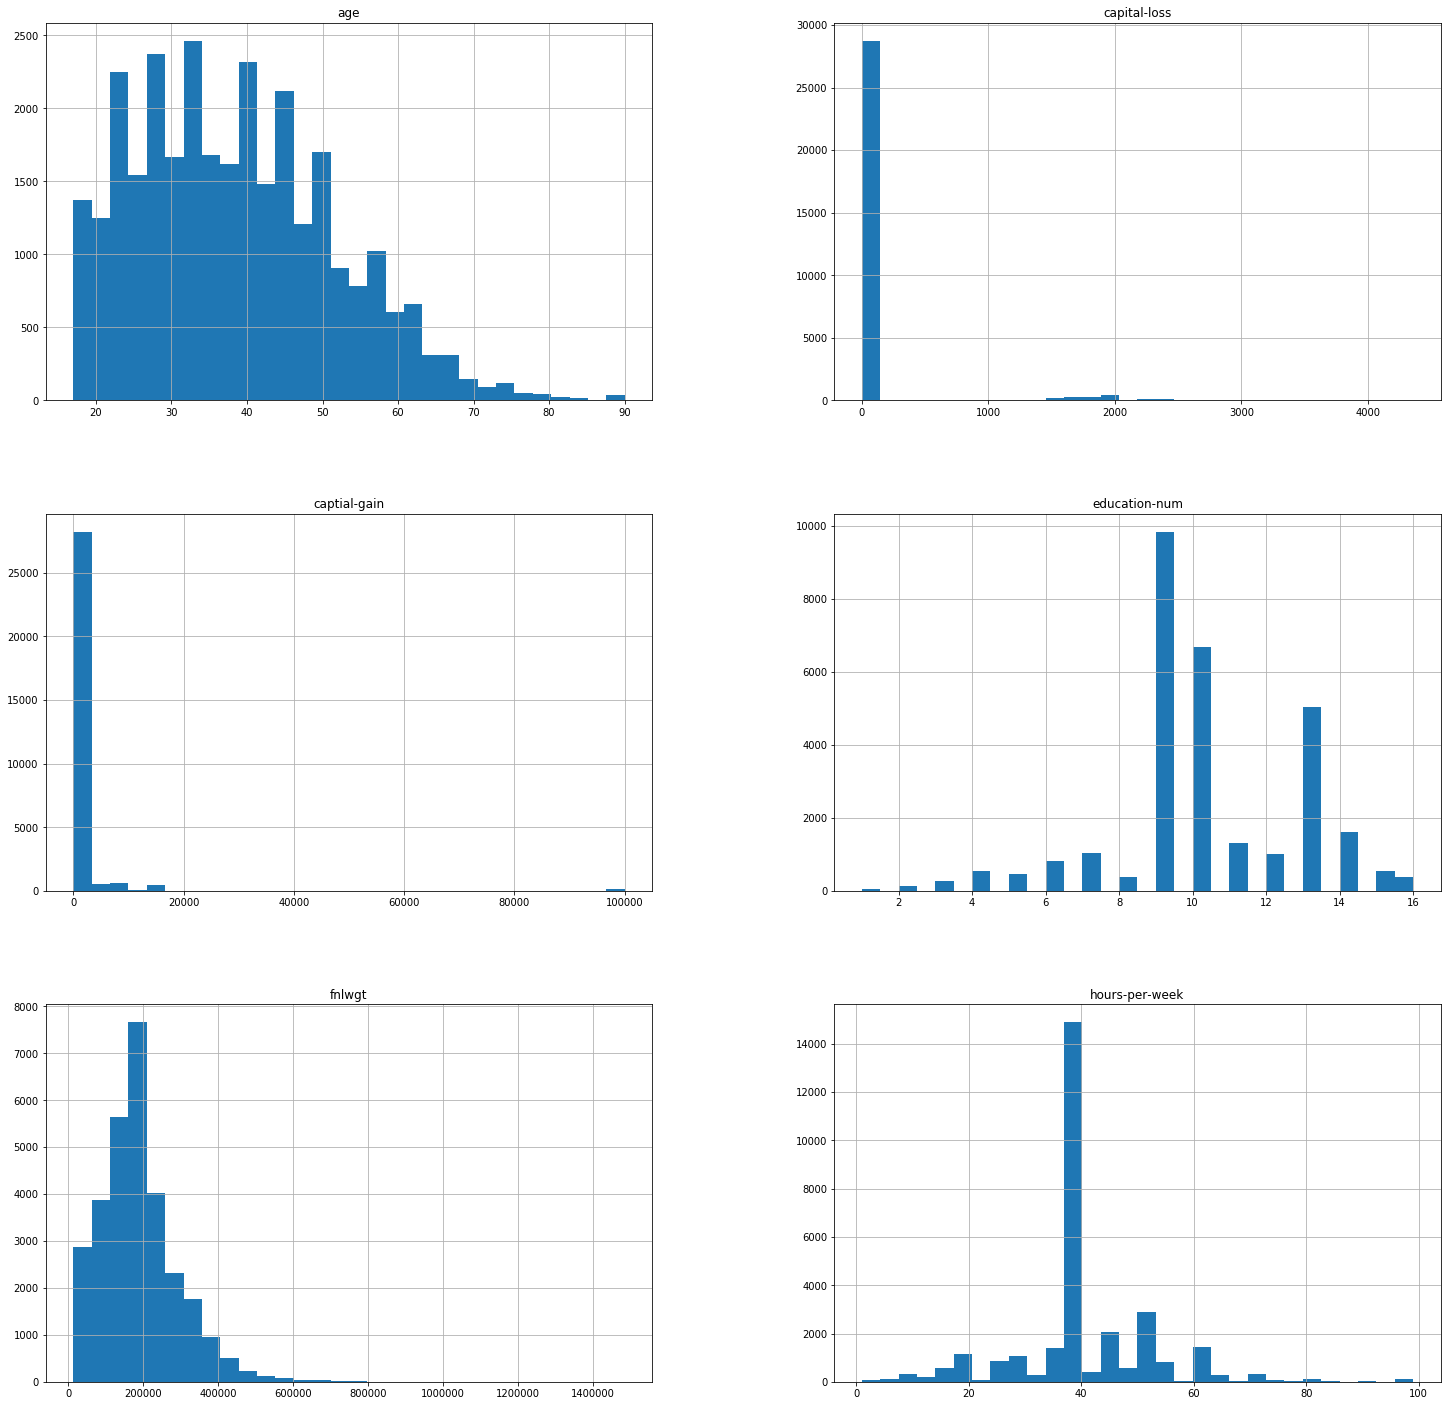

In [433]:
# To get the overall idea about the range of the attributes
X.hist(bins=30, figsize=(25,25))
plt.show()

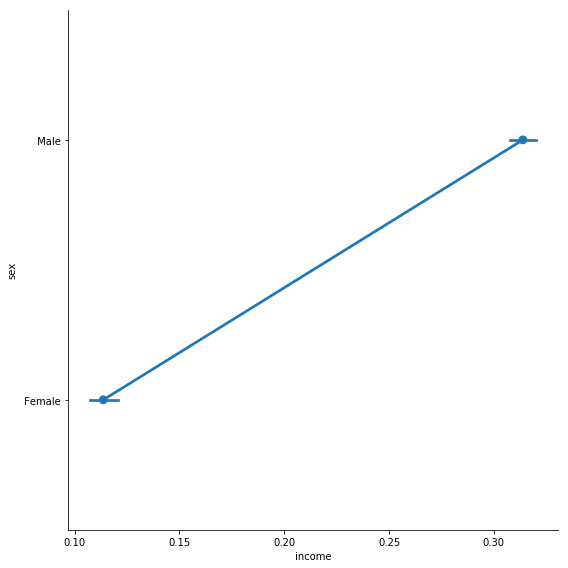

In [349]:
#Countplot for Income as per the sex
sns.catplot(data = dataset, x='income', y='sex', height = 8, kind='point' )

A plot for incomes for males and females. It depicts that incomes for males is greater compared to females.

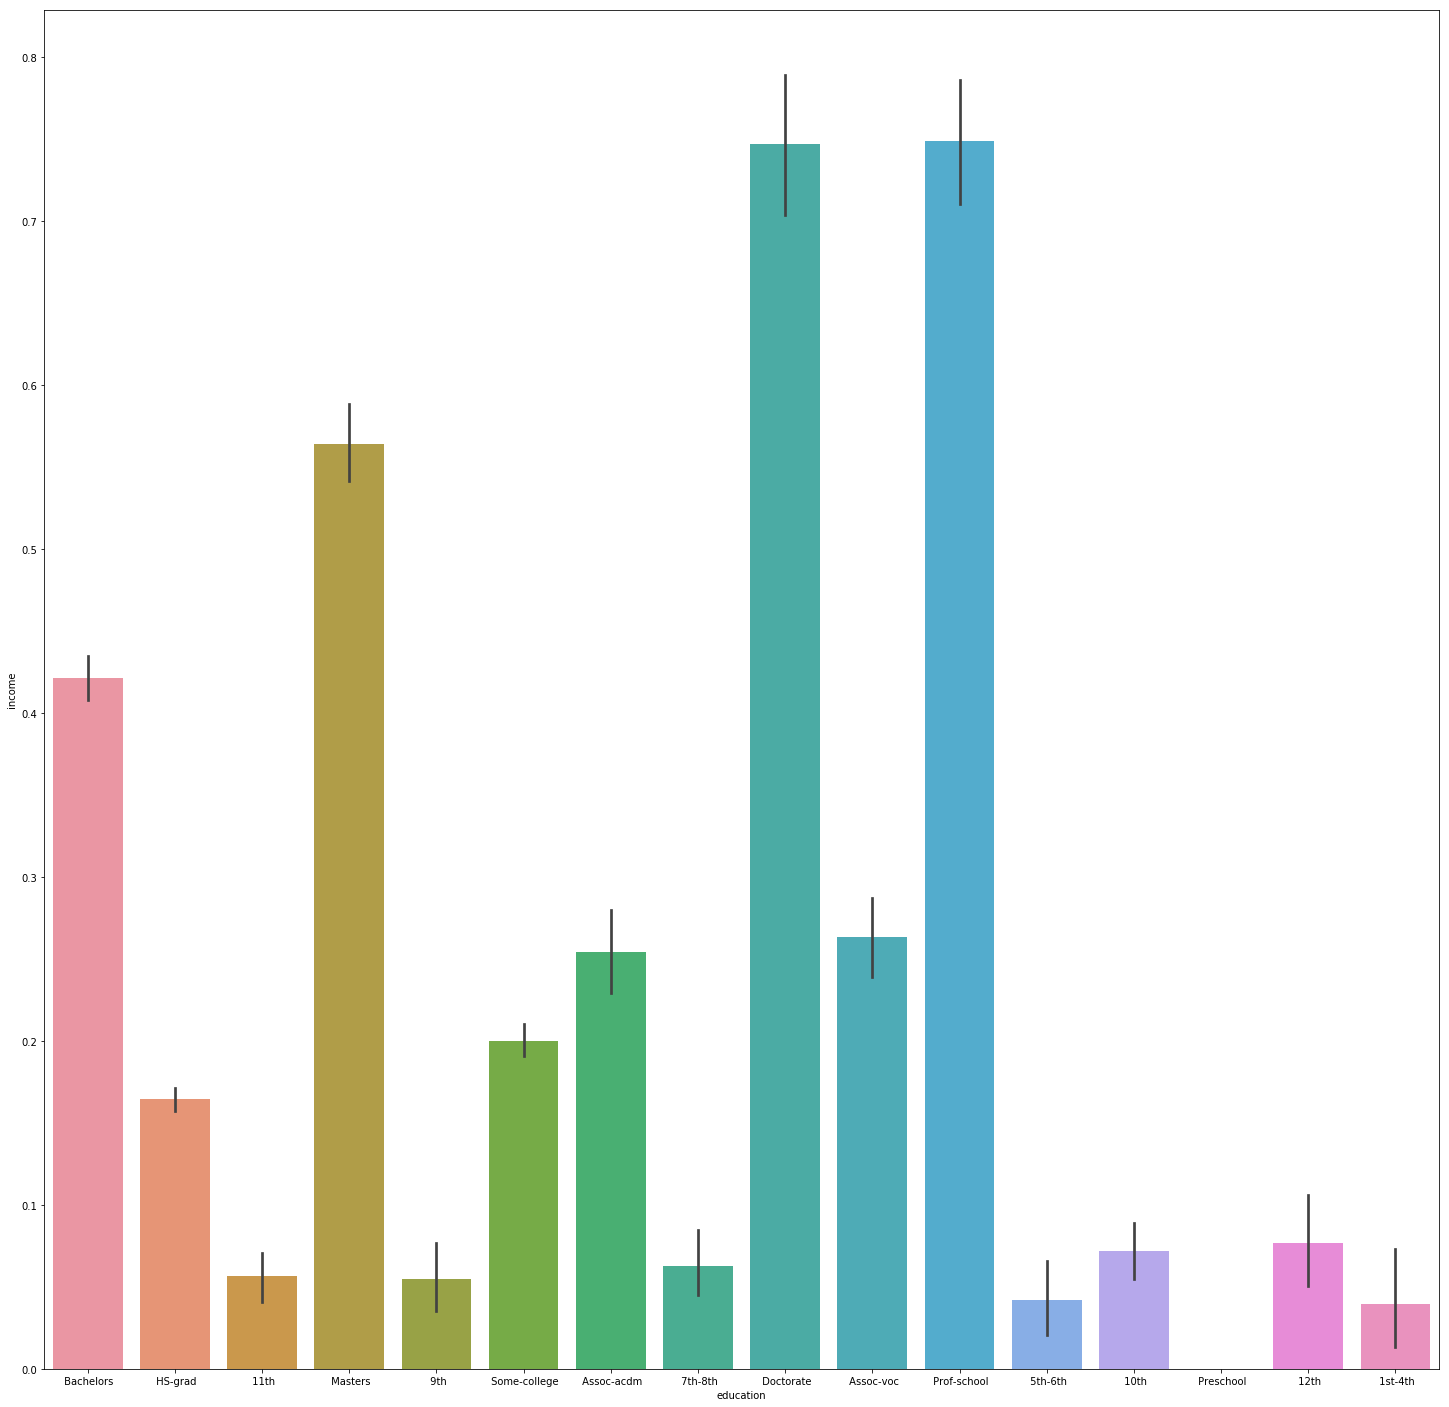

In [350]:
#Count plot as per the education of the population
plt.figure(figsize=(25,25))
sns.barplot(data=dataset, x = 'education', y = 'income')

Above plot shows the income based on the education of the population collected for this dataset. Doctorate & Prof-School seem to earning highest.

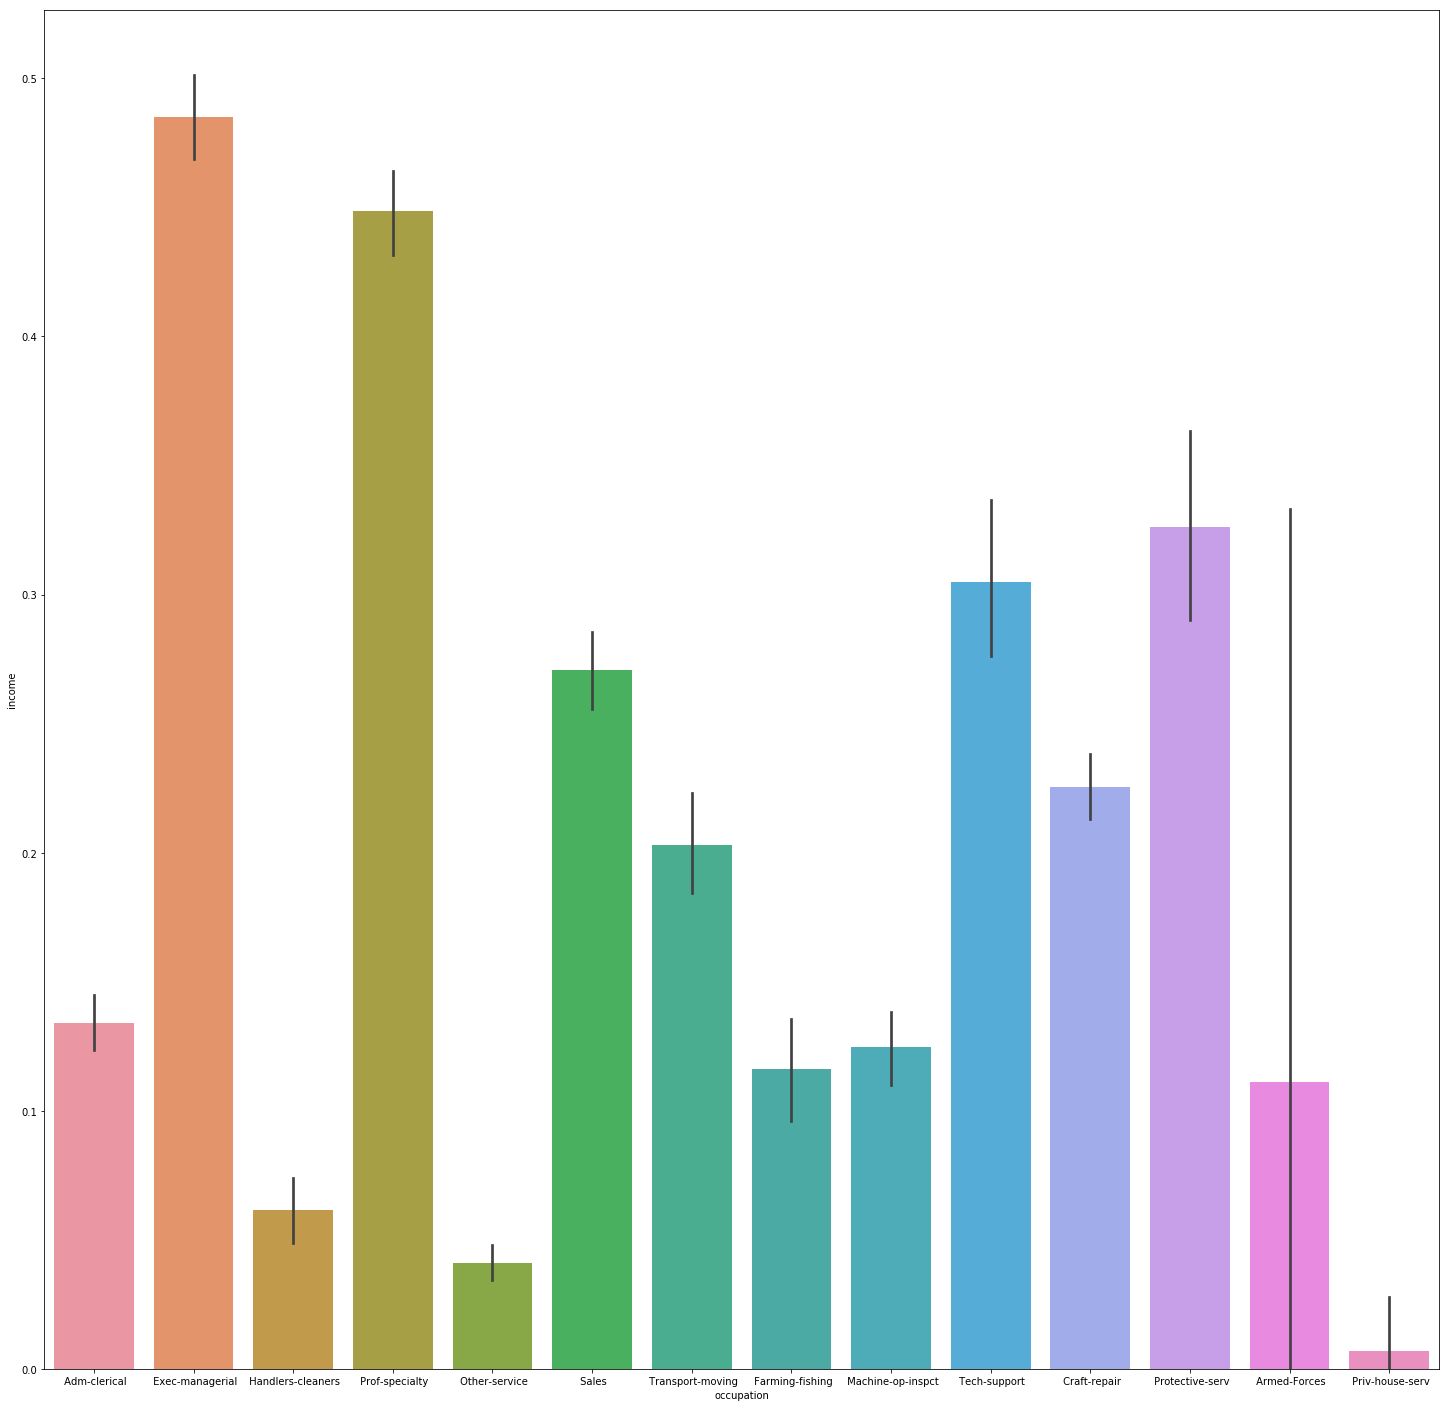

In [436]:
#Count plot as per the occupation of the population
plt.figure(figsize=(25,25))
sns.barplot(data=dataset, x = 'occupation', y = 'income')

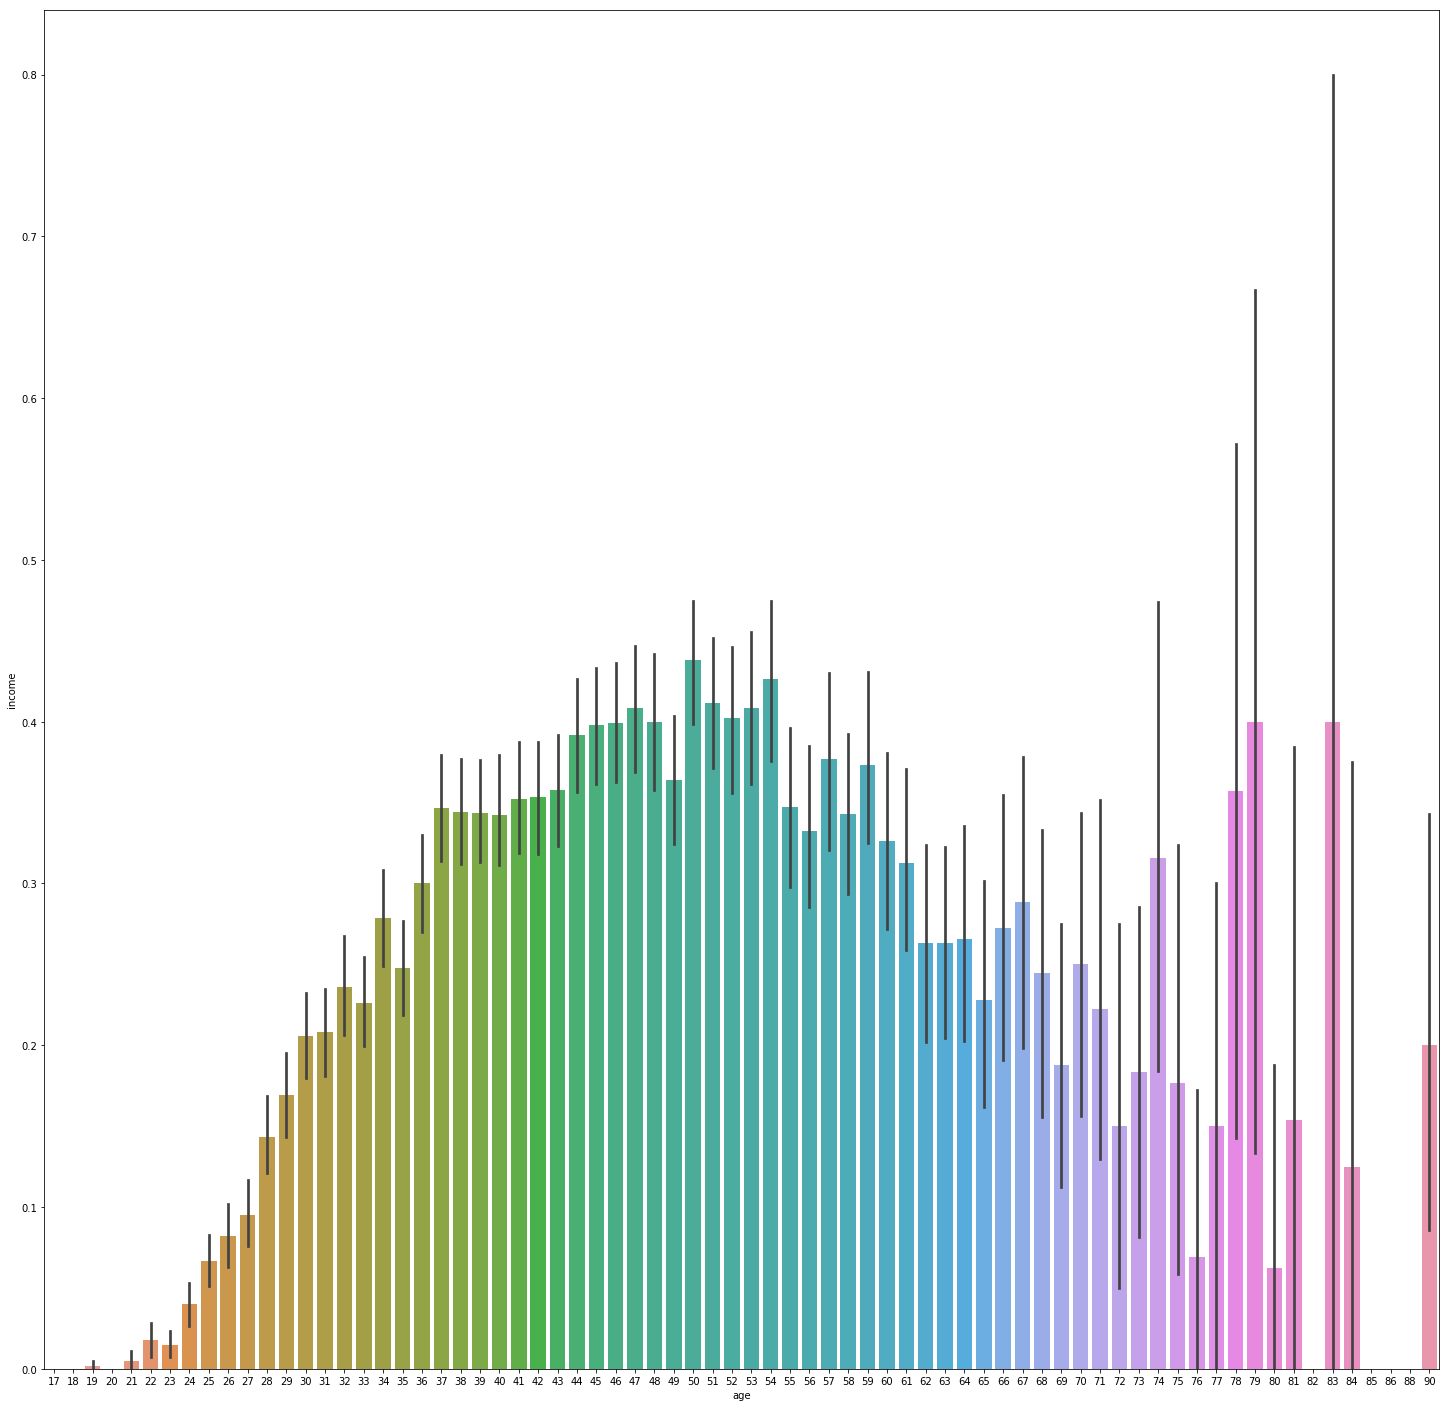

In [437]:
#Count plot for ncome as per the age of the population
plt.figure(figsize=(25,25))
sns.barplot(data=dataset, x = 'age', y = 'income')

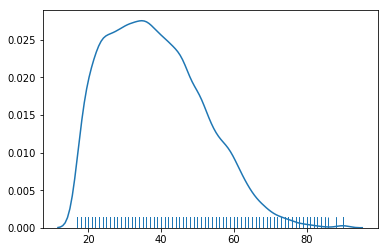

In [6]:
sns.distplot(np.array(dataset['age']), hist=False, rug=True)

### Preliminary Observation

## Preliminary observation

Again first we imported the dataset, "adult.csv" and checked the basic attributes of the dataset. On observation, we found that there are some missing values in the dataset in the form of a special character " ?", used the replace and dropna methods to take care of missing data. In this dataset, the ultimate goal was to predict whether the salary of the person is over 50K or not. However, we needed to convert this attribute to binary classifiers (0,1), where 0 means income <= 50K and 1 means income > 50K.

Next, we splitted dataset to X and Y , where Y is the dependent variable and X contains all the independent variables. Then we plotted countplots, barplots, catplots, scatter plot and histograms for these variables. Most of the people in this dataset are earning less than 50K, a very small fraction of the population was earning over 50K. Next we plotted histograms for all the continuous attributes of the dataset and observed that were no major challenges in the dataset that needed to be scaled. We plotted age, sex, education and occupation to the income and observed following:

* People with age more than 78 are more probable of earning over 50K, while people under 20 years are more probable of earning less than 50K. 
* Exec-Managerials and Prof-Speciality are the ones most probable to earn over 50K, while people in occupation like Armed Forces, Other Services, Handlers-Cleaners are less probable to earn 50K or more.
* People who work as private house servant are least probable of earning >50k.
* Probability of males earning more than 50K is greater than females as per the catplot between Sex and income.

### Preprocessing



In [4]:
dataset.describe()

,age,fnlwgt,education-num,captial-gain,capital-loss,hours-per-week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.248922
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


fnlwgt appears to be highly dispersive, we can remove it.

In [652]:
dataset = dataset.drop(['fnlwgt'], axis=1)
dataset.head()

,age,workclass,education,education-num,marital status,occupation,relationship,race,sex,captial-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [43]:
dataset.shape

(30162, 14)

Finding out the unique values for the categorical variables.

In [7]:
print(dataset.workclass.unique())
print()
print(dataset.education.unique())
print()
print(dataset['marital status'].unique())
print()
print(dataset.occupation.unique())
print()
print(dataset.relationship.unique())
print()
print(dataset.race.unique())
print()
print(dataset.sex.unique())
print()
print(dataset['native-country'].unique())

[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

[' Male' ' Female']

[' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland'

There are many unique values for each of the category. If I use one hot encoder, then the data will be very sparse. To avoid this, lets generalise some categorical variables.

##### Workclass 
Lets classify it as Govt, Private, Self Employed and Unemployed.

##### Marital Status
Lets classify this simply as married and not married.

##### Education
Lets classify education as dropout, Bachelors, Masters, CommunityCollege, Doctorate, High Grad.

##### Country
Lets classify this as USA and rest of world (ROW) to avoid complexity.



In [653]:
#Workclass

dataset['workclass'].replace(' State-gov', 'Govt', inplace=True)
dataset['workclass'].replace(' Self-emp-not-inc', 'Self-Employed', inplace=True)
dataset['workclass'].replace(' Federal-gov', 'Govt', inplace=True)
dataset['workclass'].replace(' Local-govv', 'Govt', inplace=True)
dataset['workclass'].replace(' Self-emp-inc', 'Self-Employed', inplace=True)
dataset['workclass'].replace(' Without-pay', 'Unemployed', inplace=True)

In [654]:
# Marital Status

dataset['marital status'].replace(' Never-married', 'Not Married', inplace = True)
dataset['marital status'].replace(' Married-civ-spouse', 'Married', inplace = True)
dataset['marital status'].replace(' Divorced', 'Not Married', inplace = True)
dataset['marital status'].replace(' Married-spouse-absent', 'Not Married', inplace = True)
dataset['marital status'].replace(' Separated', 'Not Married', inplace = True)
dataset['marital status'].replace(' Married-AF-spouse', 'Married', inplace = True)
dataset['marital status'].replace(' Widowed', 'Not Married', inplace = True)

In [655]:
# Native Country

for i in dataset['native-country']:
    if i != " United-States":
        dataset['native-country'].replace(i, 'ROW', inplace = True)
    else:
        dataset['native-country'].replace(i, 'USA', inplace = True)

In [656]:
#Education

dataset['education'].replace(' HS-grad', 'High Grad', inplace = True)
dataset['education'].replace(' 11th', 'Dropout', inplace = True)
dataset['education'].replace(' 9th', 'Dropout', inplace = True)
dataset['education'].replace(' 7th-8th', 'Dropout', inplace = True)
dataset['education'].replace(' 5th-6th', 'Dropout', inplace = True)
dataset['education'].replace(' 10th', 'Dropout', inplace = True)
dataset['education'].replace(' 12th', 'Dropout', inplace = True)
dataset['education'].replace(' 1st-4th', 'Dropout', inplace = True)
dataset['education'].replace(' Preschool', 'Dropout', inplace = True)
dataset['education'].replace(' Some-college', 'CommunityCollege', inplace = True)
dataset['education'].replace(' Assoc-acdm', 'CommunityCollege', inplace = True)
dataset['education'].replace(' Assoc-voc', 'CommunityCollege', inplace = True)
dataset['education'].replace(' Prof-school', 'Masters', inplace = True)
dataset['education'].replace(' Masters', 'Masters', inplace = True)

Most of the categorical data has been simplified in terms of unique categories. Now we will separate them to different columns.



In [657]:
dataset_new = pd.concat([
                            dataset.iloc[:,0:1], pd.get_dummies(dataset['workclass']),
                         pd.get_dummies(dataset['education']),dataset.iloc[:,3:4],
                       pd.get_dummies(dataset['marital status']),
                         pd.get_dummies(dataset['occupation']),
                         pd.get_dummies(dataset['relationship']),
                         pd.get_dummies(dataset['race']),
                         pd.get_dummies(dataset[ 'sex']),
                    dataset.iloc[:,9:12], pd.get_dummies(dataset['native-country']), dataset.iloc[:,-1]],  axis = 1  )

In [200]:
dataset_new.head()

,age,Local-gov,Private,Govt,Self-Employed,Unemployed,Bachelors,Doctorate,CommunityCollege,Dropout,...,Other,White,Female,Male,captial-gain,capital-loss,hours-per-week,ROW,USA,income
0,39,0,0,1,0,0,1,0,0,0,...,0,1,0,1,2174,0,40,0,1,0
1,50,0,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,13,0,1,0
2,38,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,0,40,0,1,0
3,53,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,40,0,1,0
4,28,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,40,1,0,0


In [14]:
dataset_new.shape

(30162, 48)

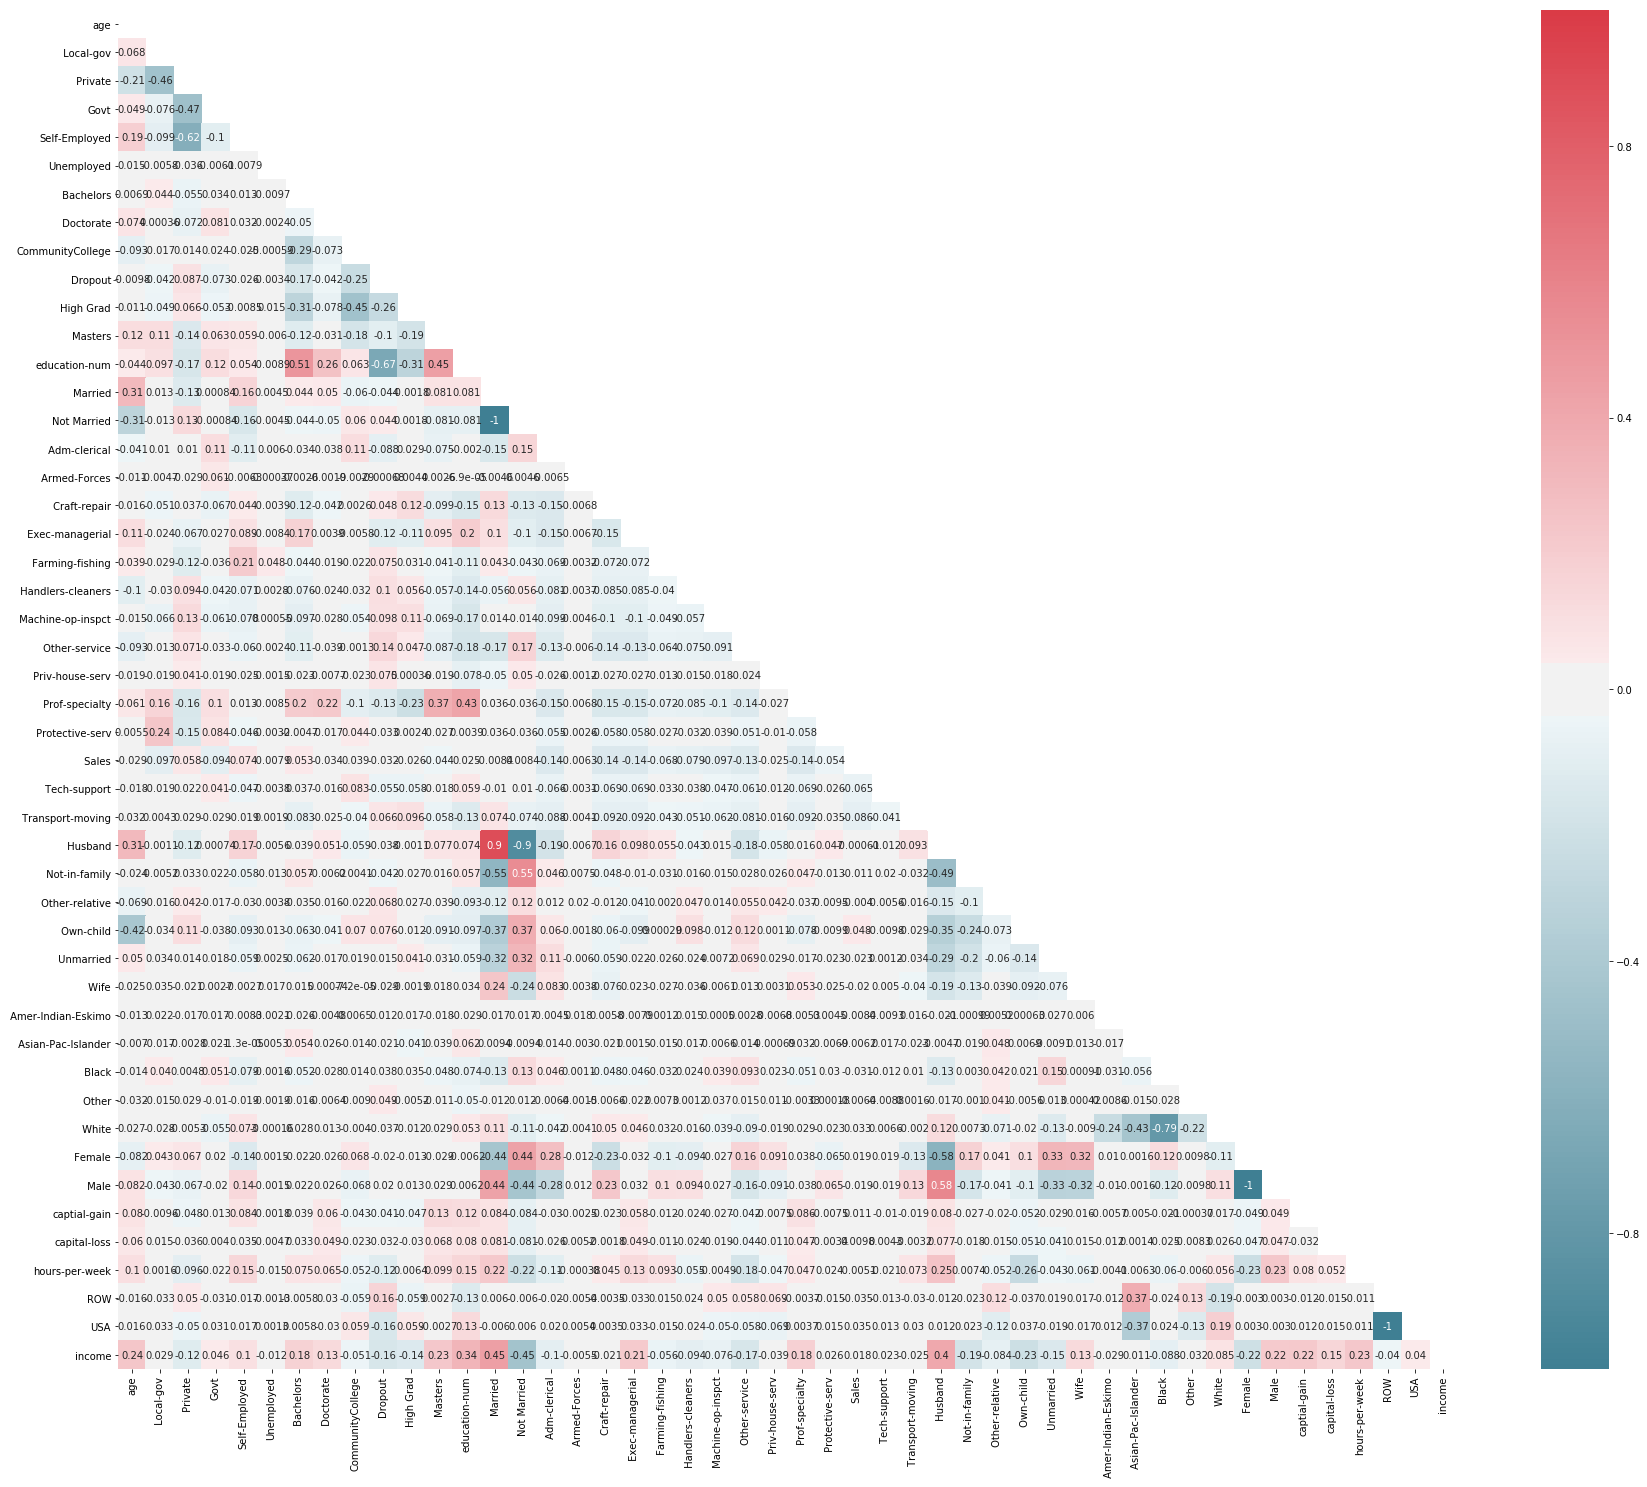

In [639]:
#Plotting the correlation heatmap

#Compute the correaltion matrix
corr = dataset_new.corr()

fif,ax = plt.subplots(figsize=(30,25))

#Generating mask for upper triangle
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220,10, as_cmap=True)

#Generate the correaltion heatmap
sns.heatmap(corr, cmap=cmap, mask=mask, annot=True)

In [640]:
corr['income'].sort_values(ascending = False)

income                 1.000000
Married                0.446110
 Husband               0.401236
education-num          0.335286
age                    0.241998
Masters                0.232721
hours-per-week         0.229480
captial-gain           0.221196
 Male                  0.216699
 Exec-managerial       0.213442
 Prof-specialty        0.181458
 Bachelors             0.178847
capital-loss           0.150053
 Doctorate             0.129162
 Wife                  0.125126
Self-Employed          0.100748
 White                 0.084735
Govt                   0.045758
USA                    0.040204
 Local-gov             0.028673
 Protective-serv       0.026360
 Tech-support          0.022829
 Sales                 0.018450
 Asian-Pac-Islander    0.011394
 Armed-Forces         -0.005506
Unemployed            -0.012406
 Craft-repair         -0.021445
 Transport-moving     -0.024944
 Amer-Indian-Eskimo   -0.029426
 Other                -0.032104
 Priv-house-serv      -0.038618
ROW     

Firstly getting rid of the attributes that have negative correlation with the data such as Private, Unemployed, CommunityCollege, Dropout, Other, etc. as mentioned in the above correlation table.

In [658]:
dataset_final = dataset_new.drop([' Private','Unemployed', 'CommunityCollege', 'Dropout', ' Other', 'ROW', ' Own-child',
                                 ' Not-in-family', ' Other-service', ' Unmarried', ' Adm-clerical', ' Handlers-cleaners',
                                 ' Black', ' Other-relative', ' Machine-op-inspct', ' Farming-fishing', ' Priv-house-serv',
                                 ' Asian-Pac-Islander',' Armed-Forces', 'Unemployed', 'Not Married', ' Craft-repair',
                                  ' Transport-moving', ' Amer-Indian-Eskimo', ' Wife', ' White', 'Self-Employed', 'Married', 
                                  'education-num', ' Tech-support'], axis=1)

dataset_final.shape

(30162, 19)

In [204]:
dataset_final.head()

,age,Local-gov,Govt,Bachelors,Doctorate,High Grad,Masters,Exec-managerial,Prof-specialty,Protective-serv,Sales,Husband,Female,Male,captial-gain,capital-loss,hours-per-week,USA,income
0,39,0,1,1,0,0,0,0,0,0,0,0,0,1,2174,0,40,1,0
1,50,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,13,1,0
2,38,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,40,1,0
3,53,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,40,1,0
4,28,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,40,0,0


So we have got rid of the categorical data and removed the unwanted columns from our dataset. Now lets split this data to training and test sets.

In [659]:
#Resetting the dataset indices
dataset_final = dataset_final.reset_index(drop = True)

##### Partitioning Data

I have defined this function to partition the dataset. This will first shuffle the indices of the dataset randomly, then I compute the size of training and test dataset and create the datasets using these randomly shuffled indices.

In [206]:
def partition(X, T, train_ratio): 
    """
    Partion the dataset to test and train
    
    Parameters
    -----------
    
    X: 2-d array of independent variables
    T: 1-d or 2-d array of dependent variable
    train_ratio : ratio of desired training dataset
    
    Returns
    --------
    
    4 lists with splitted datasets
    
    """
    
    # create random train/test split
    N = X.shape[0]
    idxs =  np.random.permutation(X.index)
    nrows = int(train_ratio * N)
    
    train_idxs = idxs[:nrows]
    test_idxs = idxs[nrows:]

    # split the actual data
    X_train, X_test = X.iloc[train_idxs], X.iloc[test_idxs]
    T_train, T_test = T.iloc[train_idxs], T.iloc[test_idxs]
    
    return X_train,X_test, T_train, T_test

The partition function that I defined will be returning dataframes not numpy arrays. I have done this because I will need these dataframes while visualizng my results in the later part of this exercise.

In [660]:
# Define Independent variables and dependent variables

X = dataset_final.iloc[:,:-1]
T = dataset_final.iloc[:,-1:]

print("X.shape = {} \nT.shape = {}".format(X.shape, T.shape))

X.shape = (30162, 18) 
T.shape = (30162, 1)


In [661]:
X_tr, X_ts, T_tr, T_ts = partition(X, T, train_ratio = 0.8 )

print(X_tr.shape, X_ts.shape, T_tr.shape, T_ts.shape)

(24129, 18) (6033, 18) (24129, 1) (6033, 1)


In [662]:
X_tr = X_tr.reset_index(drop=True)
X_ts = X_ts.reset_index(drop=True)
T_tr = T_tr.reset_index(drop=True)
T_ts = T_ts.reset_index(drop=True)

###### These are still pandas dataframes not numpy arrays. I will convert them as per the each of the algorithm requirement.

#### Normalization

In [210]:
def normalize(X):
    mean = X.mean()  #this will compute mean of every column of the dataset
    std = X.std()    #computes the standard deviation 
    return (X - mean) / std

In [663]:
X_tr_normalized = normalize(X_tr)
X_ts_normalized = normalize(X_ts)

# Methods

### Summary of Classification models

In this section, I will describe the four Classification Models that I have implemented in this notebook:

#### 1. Pocket Algorithm
The perceptron is an algorithm for supervised learning of binary classifiers. A single perceptron is a linear model that applies a step function on the linear output. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The pocket algorithm is considered able to provide for any classification problem the weight vector which satisfies the maximum number of input-output relations contained in the training set. It keeps the best solution so far in its pocket.

This is how the weights are updated in Perceptron algorithm. For both the positive and negative class:
$$
w^{(k+1)} = w^{(k)} + \alpha t_i x_i
$$

For perceptron and pocket algorithm we use -1 and 1 for coding the binary states or the two classes. If the new weights produce a smaller number of misclassification than the weights in the pocket, then replace the weights in the pocket to the new weights; if the new weights are not better than the one in the pocket, keep the one in the pocket and discard the new weights. At the end of the training iteration, the algorithm returns the solution in the pocket, rather than the last solution.

#### 2. Quadratic Discriminant Analysis (QDA)
Discriminant analysis models the distribution of the predictors X separately in each of the response classes, and then uses Bayes’ theorem to flip these around into estimates for the probability of the response category given the value of X.

Bayes' rule is given by:
$$
\begin{align*}
P(T = k \mid X = x_i) &= \frac{P(X = x_i \mid T = k) P(T=k) } {P(X=x_i)}
\end{align*}
$$

We assume that data is Gaussian or Normally distributed and use central limit theorem:

$$
p(x \mid T = k) = \frac{1}{(2\pi)^{\frac{d}{2}} \vert \boldsymbol\Sigma_k \vert^{\frac{1}{2}}} e^{ -\frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) }.
$$

Applying this to Bayes' rule, we can evaluate the discriminant function as:
$$
\delta_k(x) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (x - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (x - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Since the $\delta_k$ function is quadratic in $x$, the decision boundary is quadratic. 
We call this approach as **Quadratic Discriminant Analysis (QDA)**. 

QDA is a better option for large data sets, as it tends to have a lower bias and a higher variance.

#### 3. Linear Discriminant Analysis (LDA)
Linear Discriminant Analysis(LDA) is used to find a linear combination of features that characterizes or separates two or more classes of objects or events. LDA models the distribution of predictors separately in each of the response classes, and then it uses Bayes’ theorem to estimate the probability of each class similar to QDA.The resulting combination is used as a linear classifier. It is similar to QDA, only difference being the same covariance matrix in LDA for all the classes as the maintainance of covariance is not cheap.

So, let $\boldsymbol\Sigma_k = \boldsymbol\Sigma$

The discriminant function for a LDA CLassifier with k classes can be summarized as:
$$
\delta_k(x) = x^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_k -\frac{1}{2} \boldsymbol\mu_k^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

LDA is more suitable for smaller data sets, and it has a higher bias, and a lower variance.

#### 4. Logistic Regression
Logistic Regression uses a sigmoid function to model binary dependent variable. Data is fit into linear regression model, which then be acted upon by a logistic function predicting the target categorical dependent variable. It is three different types:
a. Binary Logistic Regression
b. Multinomial Logistic Regression
c. Ordinal Logistic Regression

To use Logistic Regression as a Multinomial or Ordinal Logistic Regression, we use a Softmax function. We convert our output target to a (N X k) matrix, where N is number of rows in dataset and k is the number o classes. Then, we use a Softmax Transformation functiondefined as:
$$
g_k(x) = P(T=k \mid x) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

This generalizes the logistic sigmoid function and the derivatives are given by itself

$$
\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j).
$$

Like Linear Regression, we need to update the weight w with gradient:
$$
w_j \leftarrow w_j + \alpha X^\top \Big(  T - g(X)\Big)
$$

### Explanation of codes

After explaining the equations to find the weight and discriminant functions, here is how I implemented both of these algorithms to fit my dataset. Initailly, we define a super class with BaseModel having train and use methods. Next we define a derived class Classifier that inherits BaseModel Class. We have additonal methods like **__init__** to initialise weight vector w as none, mean and standard deviation as none; **_checkMatrix** to check the shape of a matrix as (m X n); **add_ones** to modify the input dataset to add a column of ones for Pocket Algorithm and Logistic Regression:

$$
\begin{align}
f(x;w) = w_0 x_0 + w_1 x_1 + w_2 x_2 + ........ + w_D x_D
\end{align}
$$

Here $x_0 = 0 $. So, we define add_ones method to modify our dataset to add a column of ones at the beginning.
Next, lets review the implementation of all the four algorithms described in above section.


#### Pocket Algorithm
We define **PocketAlgorithm** class that inherits **Classifier**.Firstly, we initialise the weight vector w as None in __init__ method. Now, we train our model for the dataset using train method. Initally, we modify the dataset X using the add_ones method from super class so that our dataset now conatins an additonal column of 1's as its first column. As the next step in train method, we fit our dataset to the PocketAlgorithm Model, calculating the best weight vector w (using the equation as described in previous section) for our model. We have additional variable w_pocket that stores the best weight vector and it uses compare function to compute the convergence.

We split our dataset to test and train. Now since we have trained our model, we will be applying this trained model to our test dataset to get the predictions. Here, we define a use function to predict the values for test data. We initially use add_ones method to modify the dataset and then perform dot product of X and weight vector w, that we computed in train method. This function will return a list of predicted values.

### Quadratic Discriminant Analysis (QDA)
We define **QDA** class that inherits **Classifier**. For this classifier, we need for each class to train the model. Here is how I did it:
Initially, I took my training data and sort it wrt to each class k. (Both dependent and independent variables)
Next, I computed the variables N1 and N2 which are nothing but the index of both the classes in my training data.
I concatenated both the datasets and used it as tarining data for my train method of QDA classifier. I also used N1 and N2 to compute mean and prior probability of each class. In train method, I am simply calculating the mean, covariance and prior probability of each class and storing them in class variables.
Next, we use the above computed values for our use method which will be used to evaluate the discriminant function for the test dataset.
In use method, firstly, I compute the inverse of covariance matrix using np.linalg.inv and diffV is nothing but the difference of test data with the mean that was calculated in training data.
Finally we compute the discriminant values on our test data and returns it. Lastly, we will be applying argmax to find out the class of test data predicted by the QDA classifier.

This is how my QDA classifier works.


#### Linear Discriminant Analysis (LDA)
We define **LDA** class that inherits **Classifier**.As discussed in the previous section that QDA and LDA as similar, the only differnece being the same covariance matrix in LDA due to high maintenance cost in QDA. So, the codes for both the algorithms are also similar. Here is how this classifier works:
The dataset used for LDA is similar to QDA.
In train method, I am simply calculating the mean and prior probability of each class and storing them in class variables. But this time, I comuputed the covariance of entire dataset and stored it in Sigma. 
In the use method, firstly compute the inverse of covariance matrix using np.linalg.inv
Finally we compute the discriminant values on our test data using the LDA discriminaant function and returns it. Lastly, we will be applying argmax to find out the class of test data predicted by the LDA classifier. 

#### Logistic Regression
We define **LogisticRegression** class that inherits **Classifier**.Implementation of Logistic Regression is quite similar to Least Mean Squares Algorithm. However, additionally we have Softmax Transformation function described in previous section. We don't split the training data as per classes this time unlike QDA or LDA. However, T is of shape (N X K). We initialise the weight vector a bit differently here. It is (D+1) X K. We calculate weight vector for each class in this classifier. We define the learning rate and iterate over the dataset ultiple times to get the best weight vector. In use function, I used the weight vector to compute the probability of each class as predicted using the Softmax Transformation function and then apply argmax to finally get the class predction by Logistic Regression Classifier.

So, this is how all these classifiers are implemented in the next section of this notebook.

### Correct Implementation

#### A. Super Classs Definition

In [212]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

### B. Pocket Algorithm

In [213]:
from copy import deepcopy as copy

class PocketClassifier(Classifier):
    
    def __init__(self, alpha):
        self.w = None
        self.w_pocket = None
        self.alpha = alpha
        
    def compare(self, X1, T, w, w_pocket):
        y = np.sign(X1 @ w)
        y_pocket = np.sign(X1 @ w_pocket)
        
        return 1 if(np.sum(y == T) > np.sum(y_pocket == T)) else -1
        
    def train(self, X, T):
        maxiter = 1
        X1 = super().normalize(X)
        X1 = super().add_ones(X1)
        #print(X1)
        
        self.w = np.zeros(X1.shape[1])
        self.w_pocket = copy(self.w)
        
        for i in range(maxiter):
            converge = True
            for j in range(X1.shape[0]):
                y = X1[j] @ self.w
                if(np.sign(y) != np.sign(T[j])):
                    self.w += self.alpha * X1[j] * T[j]
                    converge = False
                    if(self.compare(X1, T, self.w, self.w_pocket) > 0):
                        self.w_pocket[:] = self.w[:]
            if converge:
                break
                
    def use(self, X):
        X1 = super().normalize(X)
        X1 = super().add_ones(X1)
        return X1 @ self.w_pocket

In [134]:
#Copying the independent variables separately for Pocket Algorithm
T_tr_p = copy(T_tr)
T_ts_p = copy(T_ts)

For pocket algorithm , lets change the classes as ( -1, 1 )

In [135]:
#replace 0 with -1
T_tr_p['income'].replace(0, -1, inplace = True)
T_ts_p['income'].replace(0, -1, inplace = True)

In [136]:
T_tr_p.isnull().sum(), T_ts_p.isnull().sum()

(income    0
 dtype: int64, income    0
 dtype: int64)

In [137]:
#Convert Test and train data to numpy arrays

X_tr_p = X_tr.values
X_ts_p = X_ts.values
T_tr_p = T_tr_p.values
T_ts_p = T_ts_p.values

In [138]:
X_tr_p.shape, T_tr_p.shape, X_ts_p.shape, T_ts_p.shape

((24129, 18), (24129, 1), (6033, 18), (6033, 1))

In [141]:
pocket = PocketClassifier(0.002)
pocket.train( X_tr_p,T_tr_p )

In [142]:
y_pred_pocket = pocket.use(X_ts_p)
y_pred_pocket

array([-0.03016603, -0.00871479, -0.03049371, ..., -0.01334851,
       -0.02438886, -0.00617596])

Converting the continous values into to two separate classes can be as:

In [826]:
y_pocket = np.where(y_pred_pocket < 0, 0, 1)
y_pocket

array([0, 0, 0, ..., 0, 0, 0])

### C. QDA

In [696]:
class QDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        self.mu1 = None
        self.mu2 = None
        self.Sigma1 = None
        self.Sigma2 = None
        self.prior1 = None
        self.prior2 = None
    
    def train(self, X, N1, N2):
        #Total samples
        N = N1 + N2
        #X = super().normalize(X)
        self.mu1 = np.mean(X[:N1],axis=0)
        self.mu2 = np.mean(X[N1:],axis=0)

        self.Sigma1 = np.cov(X[:N1].T)
        self.Sigma2 = np.cov(X[N1:].T)
        
        self.prior1 = N1 / N
        self.prior2 = N2 / N
        
    def use(self, X):
        #X = super().normalize(X)
        sigma_inv1 = np.linalg.inv(self.Sigma1)
        sigma_inv2 = np.linalg.inv(self.Sigma2)
        
        diffV1 = X - self.mu1
        diffV2 = X - self.mu2
        
        d1 = -0.5 * np.log(np.linalg.det(self.Sigma1)) - 0.5 * np.sum(diffV1 @ sigma_inv1 * diffV1, axis=1) + np.log(self.prior1)
        d2 = -0.5 * np.log(np.linalg.det(self.Sigma2)) - 0.5 * np.sum(diffV2 @ sigma_inv2 * diffV2, axis=1) + np.log(self.prior2)
        
        y = np.argmax((d1,d2),axis=0)
        
        return y

For QDA, we need our training data to be separated by different classes. In this dataset, we have just two classes 0 : adults having income less than 50K and 1: adults having income more than 50K.

I have defined below function to split dataset into two for each per class.

In [160]:
def DatasetSplit(X, attribute):
    d1 = X.where( X[attribute] == 0).dropna()
    d2 = X.where( X[attribute] == 1).dropna()
    return d1, d2

I will be using normalised training and test data for QDA. Lets prepare dataset for QDA before running it.

In [702]:
X_tr_QDA = copy(X_tr)
X_ts_QDA = copy(X_ts)
T_tr_QDA = copy(T_tr)
T_ts_QDA = copy(T_ts)

Lets merge X_tr_QDA and T_tr_QDA before splitting data for each class.

In [703]:
X_QDA = pd.concat([X_tr_QDA,T_tr_QDA], axis=1)
X_QDA.shape

(24129, 19)

In [704]:
X_QDA.tail()

,age,Local-gov,Govt,Bachelors,Doctorate,High Grad,Masters,Exec-managerial,Prof-specialty,Protective-serv,Sales,Husband,Female,Male,captial-gain,capital-loss,hours-per-week,USA,income
24124,35,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,50,1,0
24125,55,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,25,1,0
24126,23,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,60,1,0
24127,40,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,45,1,0
24128,68,0,0,0,0,0,1,0,0,0,0,0,1,0,6360,0,20,1,0


Now lets split our dataset using DatasetSplit function defined above.

In [705]:
X1, X2 = DatasetSplit(X_QDA, 'income')

In [706]:
X1.shape, X2.shape

((18097, 19), (6032, 19))

Sorting the dataset wrt to k classes.

In [707]:
X_QDA = pd.concat([X1,X2])
X_QDA.shape

(24129, 19)

In [708]:
#Taking off the target variable 'income'
X_QDA = X_QDA.iloc[:,:-1]

In [709]:
X_QDA.shape

(24129, 18)

Lets calculate N1 and N2 from these splitted data.

In [710]:
N1 = X1.shape[0]
N2 = X2.shape[0]

N1,N2

(18097, 6032)

In [711]:
#Apply QDA to this data

qda = QDA()
qda.train(X_QDA.values, N1, N2)

In [712]:
y_QDA = qda.use(X_ts_QDA.values)
y_QDA

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [713]:
len(y_QDA[y_QDA==0]), len(y_QDA[y_QDA==1])

(3745, 2288)

### D. LDA

In [722]:
class LDA(Classifier):
    def __init__(self):
        Classifier.__init__(self)
        self.mu1 = None
        self.mu2 = None
        self.Sigma = None
        self.prior1 = None
        self.prior2 = None
        
    
    def train(self,X, N1, N2):
        X = super().normalize(X)
        N = N1 + N2
        self.mu1 = np.mean(X[:N1],0)
        self.mu2 = np.mean(X[N1:],0)
        
        self.Sigma = np.cov(X.T)

        self.prior1 = N1 / N
        self.prior2 = N2 / N
        
        
    def use(self,X):
        X = super().normalize(X)
        sigma_inv = np.linalg.inv(self.Sigma)
        
        d1 = np.sum(np.dot(X, sigma_inv) * self.mu1 - 0.5 * np.dot(self.mu1, sigma_inv) * self.mu1 + np.log(self.prior1), axis=1)
        d2 = np.sum(np.dot(X, sigma_inv) * self.mu2 - 0.5 * np.dot(self.mu2, sigma_inv) * self.mu2 + np.log(self.prior2), axis=1)
        y = np.argmax((d1,d2),axis=0)
        return y
        

We will use the datasets that we prepared for QDA here.


In [290]:
#datasets for LDA

X_tr_LDA = copy(X_QDA)
X_ts_LDA = copy(X_ts_QDA)
T_tr_LDA = copy(T_tr_QDA)
T_ts_LDA = copy(T_ts_QDA)

In [716]:
X_tr_LDA.shape, X_ts_LDA.shape, T_tr_LDA.shape, T_ts_LDA.shape

((24129, 18), (6033, 18), (24129, 1), (6033, 1))

In [292]:
# Apply LDA

lda = LDA()
lda.train(X_tr_LDA, N1, N2)

In [293]:
y_LDA = lda.use(X_ts_QDA_f)
y_LDA

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [294]:
len(y_LDA[y_LDA==0]), len(y_LDA[y_LDA==1])

(4797, 1236)

### E. Logistic Regression

In [505]:
class LogisticRegression(Classifier):
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self, z):
        f = np.exp(z)
        return f / np.sum(f, axis=1, keepdims=True)
    
    def g(self, X, w):
        return self.softmax( X @ w )
    
    def train(self, X, T):
        X1 = super().add_ones(X)
        D = X1.shape[1]
        K = T.shape[1]
        max_iter = 1
        self.w = np.zeros((D,K))
        for i in range(max_iter):
            y = self.g(X1, self.w)
            self.w += self.alpha * X1.T @ (T - y)
            
    def use(self, X):
        X1 = super().add_ones(X)
        y = self.g(X1, self.w)
        y_pred = np.argmax(y, axis = 1)
        return y_pred

For Logistic regression, we need to convert Target variable to N X k matrix.
Lets do it!

In [296]:
T_tr_LR = pd.get_dummies(T_tr['income'])
T_tr_LR.shape

(24129, 2)

In [298]:
T_tr_LR.tail()

,0,1
24124,1,0
24125,1,0
24126,0,1
24127,1,0
24128,1,0


In [303]:
X_tr_LR = copy(X_tr_normalized)
X_ts_LR = copy(X_ts_normalized)
T_ts_LR = copy(T_ts)

In [304]:
X_tr_LR.shape, X_ts_LR.shape,T_tr_LR.shape, T_ts_LR.shape

((24129, 18), (6033, 18), (24129, 2), (6033, 1))

In [307]:
logisticReg = LogisticRegression(0.005)

In [308]:
logisticReg.train(X_tr_LR,T_tr_LR)

In [417]:
y_LogReg = logisticReg.use(X_ts_LR)
y_LogReg

array([0, 0, 0, ..., 0, 1, 1], dtype=int64)

In [418]:
len(y_LogReg[y_LogReg==0]), len(y_LogReg[y_LogReg==1])

(4175, 1858)

# Experiments

### Discussion About Evaluation Metrics

In this section, we will discuss some popular classification measurements and evaluate metrics for our models that we implemented in previous section.

The most basic one of them is Accuracy:
$$
   \text{Accuracy} = \frac{\text{The number of correct classification}}{\text{The number of samples}}.
$$

#### Confusion Matrix
A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa). With confusion matrix we get information about the classification results. 

#### Precision
Precision is number of items correctly identified as positive out of total items identified as positive.

$$
\text {precision} = \frac{\text{ TP } } {\text{ TP + FP } } 
$$

#### Recall or Sensitivity or TPR (True Positive Rate)
Recall is number of items correctly identified as positive out of total true positives.

$$
\text {recall} = \frac{\text{ TP } } {\text{ TP + FN } } 
$$

#### Specificity or TNR (True Negative Rate)
Specificity is Number of items correctly identified as negative out of total negatives.

$$
\text {specificity} = \frac{\text{ TN } } {\text{ TN + FP } } 
$$

#### False Positive Rate or Type I Error
Number of items wrongly identified as positive out of total true negatives.

$$
\text {FPR} = \frac{\text{ FP } } {\text{ TN + FP } } 
$$

#### False Negative Rate or Type II Error
Number of items wrongly identified as negative out of total true positives.

$$
\text {FNR} = \frac{\text{ FN } } {\text{ TP + FN } } 
$$

#### F1 Score
It is the harmonic mean of precision and score and given by:

$$
F_1 = 2 \times \frac{precision \times recall}{precision + recall}
$$

#### MCC (Matthews Correlation Coefficient)
It uses all the counts given in confusion matrix.

$$
MCC = \frac{TP \times TN – FP \times FN}{\sqrt{(TP +FP) \times (TP + FN) \times (TN + FP) \times (TN + FN)}}
$$

#### The ROC (Receiver Operating Characteristic) Curve

The ROC curve is another popular tool for binary classifications. The ROC curve plots the true positive rate (recall) vs the false positive rate (1 - specificity).  Ideally, we would like to have high sensitivity & high specificity, but in real-world scenarios, there is always a tradeoff between sensitivity & specificity. ROC Curve Analysis provides tools to select possible optimal models and to discard suboptimal ones independently from the class distribution. 

#### AUC (Area Under the Curve)

For the ROC curve, AUC measures the area to represent it with a numeric value by simply computing the area under the curve. AUC values are used also for various graphical measurement such as PR (Precision-Recall) curve. 
Some important characteristics of ROC-AUC are-

* The value can range from 0 to 1. However AUC score of a random classifier for balanced data is 0.5
* ROC-AUC score is independent of the threshold set for classification because it only considers the rank of each prediction and not its absolute value. The same is not true for F1 score which needs a threshold value in case of probabilities output.

### Discussion About Train and Test Accuracies

In this section we will evaluate metrices for the four models we implemented in the previous sections.

In [353]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, confusion_matrix, roc_curve, auc

#### Pocket Algorithm

In [401]:
confusion_matrix(T_ts_p, y_pocket)

array([[4456,   88],
       [1200,  289]], dtype=int64)

In [399]:
print("Accuracy:", round((accuracy_score(T_ts_p,y_pocket)*100),2), "%")
print("F1 Score: ",round(f1_score(T_ts_p, y_pocket, average="macro"),3))
print("Precision: ",round(precision_score(T_ts_p, y_pocket, average="macro"),3))
print("Recall: ",round(recall_score(T_ts_p, y_pocket, average="macro"),3))
print("MCC:", round(matthews_corrcoef(T_ts_p,y_pocket),3))

Accuracy: 78.65 %
F1 Score:  0.592
Precision:  0.777
Recall:  0.587
MCC: 0.311


#### QDA

In [725]:
confusion_matrix(T_ts_QDA,y_QDA)

array([[3121, 1436],
       [ 624,  852]], dtype=int64)

In [726]:
print("Accuracy:", round((accuracy_score(T_ts_QDA,y_QDA)*100),2), "%")
print("F1 Score: ",round(f1_score(T_ts_QDA, y_QDA, average="macro"),3))
print("Precision: ",round(precision_score(T_ts_QDA, y_QDA, average="macro"),3))
print("Recall: ",round(recall_score(T_ts_QDA, y_QDA, average="macro"),3))
print("MCC:", round(matthews_corrcoef(T_ts_QDA,y_QDA),3))

Accuracy: 65.85 %
F1 Score:  0.602
Precision:  0.603
Recall:  0.631
MCC: 0.232


#### LDA

In [727]:
confusion_matrix(T_ts_LDA,y_LDA)

array([[3612,  945],
       [1185,  291]], dtype=int64)

In [728]:
print("Accuracy:", round((accuracy_score(T_ts_LDA,y_LDA)*100),2), "%")
print("F1 Score: ",round(f1_score(T_ts_LDA, y_LDA, average="macro"),3))
print("Precision: ",round(precision_score(T_ts_LDA, y_LDA, average="macro"),3))
print("Recall: ",round(recall_score(T_ts_LDA, y_LDA, average="macro"),3))
print("MCC:", round(matthews_corrcoef(T_ts_LDA,y_LDA),3))

Accuracy: 64.69 %
F1 Score:  0.493
Precision:  0.494
Recall:  0.495
MCC: -0.011


#### Logistic Regression

In [419]:
confusion_matrix(T_ts_LR, y_LogReg)

array([[3688,  825],
       [ 487, 1033]], dtype=int64)

In [420]:
print("Accuracy:", round((accuracy_score(T_ts_LR,y_LogReg)*100),2), "%")
print("F1 Score: ",round(f1_score(T_ts_LR, y_LogReg, average="macro"),3))
print("Precision: ",round(precision_score(T_ts_LR, y_LogReg, average="macro"),3))
print("Recall: ",round(recall_score(T_ts_LR, y_LogReg, average="macro"),3))
print("MCC:", round(matthews_corrcoef(T_ts_LR,y_LogReg),3))

Accuracy: 78.25 %
F1 Score:  0.73
Precision:  0.72
Recall:  0.748
MCC: 0.467


### Plots for Results

#### ROC Curves

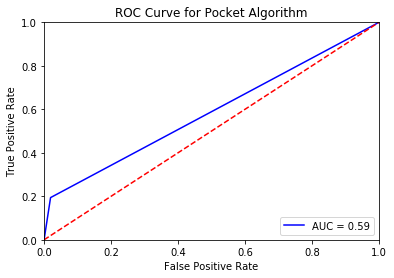

In [339]:
fpr, tpr, threshold = roc_curve(T_ts_p, y_pocket)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for Pocket Algorithm')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

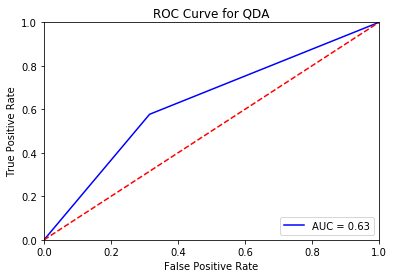

In [729]:
fpr, tpr, threshold = roc_curve(T_ts_QDA, y_QDA)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for QDA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

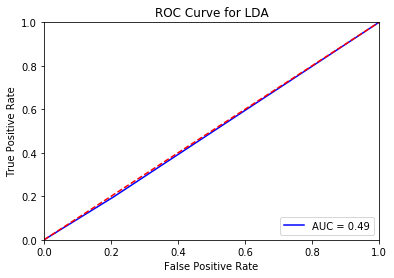

In [732]:
fpr, tpr, threshold = roc_curve(T_ts_LDA, y_LDA)
roc_auc = auc(fpr, tpr)

plt.title('ROC Curve for LDA')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


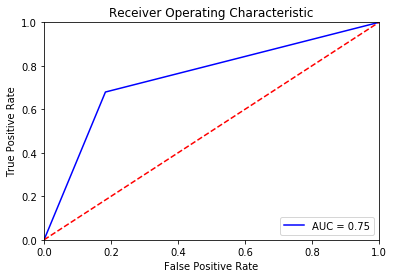

In [340]:
fpr, tpr, threshold = roc_curve(T_ts_LR, y_LogReg)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


The above plots shows the ROC Curve for each of the algorithm. As we know, higher the area under the curve (AUC), better the model. Logistic Regression has the best AUC under ROC curve of 0.75 where as LDA has least of 0.41. We will discuss these results in more detail in the next section.

#### Plot for Pocket Algorithm
I have done sampling of 100 datapoints from test and predicted sets to plot this.

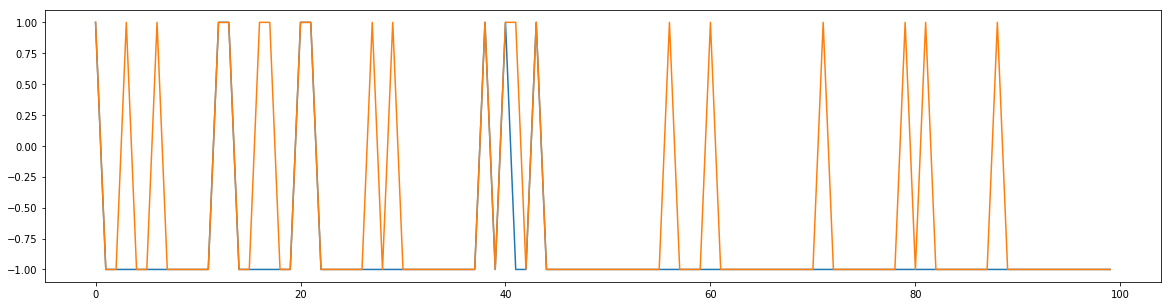

In [458]:
plt.figure(figsize=(20,5))
plt.plot(y_pocket[1900:2000])
plt.plot(T_ts_p[1900:2000])

#### Plot for QDA

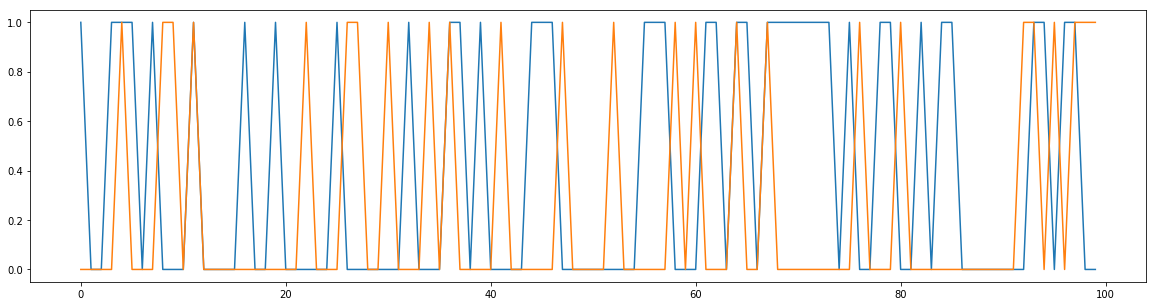

In [733]:
plt.figure(figsize=(20,5))
plt.plot(y_QDA[2500:2600])
plt.plot(T_ts_QDA_f[2500:2600])

#### Plot for LDA

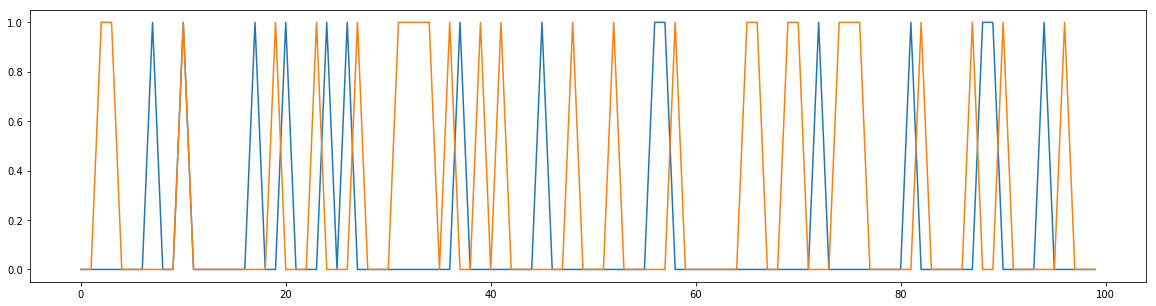

In [744]:
plt.figure(figsize=(20,5))
plt.plot(y_LDA[150:250])
plt.plot(T_ts_QDA_f[150:250])

#### Plot for Logistic Regression 
I have done sampling of 100 datapoints from test and predicted sets to plot this and make this plot understandable.

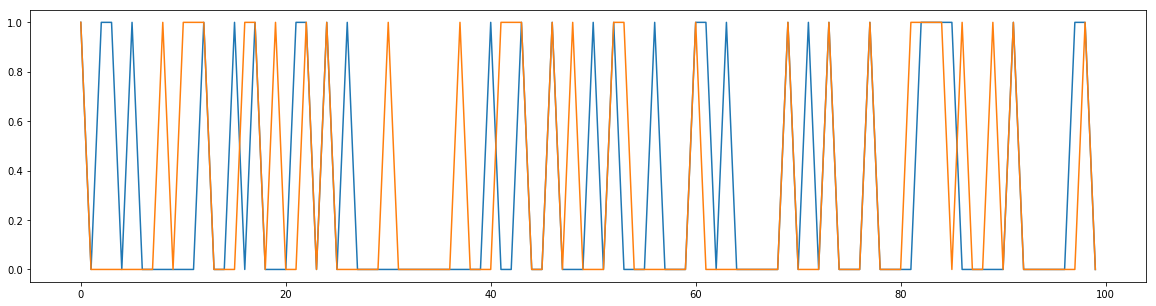

In [459]:
plt.figure(figsize=(20,5))
plt.plot(y_LogReg[100:200])
plt.plot(T_ts_LR.iloc[100:200,:].values)

I have used above four plots to show the overlap of test and predicted sets. As the test was large enough i.e. it contained more than 6K samples, so I randomly picked few datapoints in middle of the dataset to visualise how model is performing. We can that the Pocket Classifier and Logistic Regression are doing for this dataset. QDA is performing worst for my dataset as the basic assumption of QDA and LDA is that the dataset should be Gaussian or normally distributed, which doesn't seem to be a case here.

#### Confusion Matrix Color Plot for all Algorithms

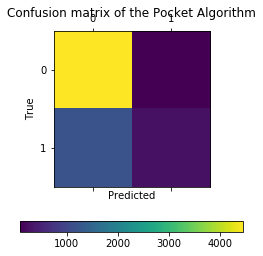

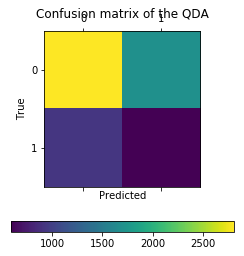

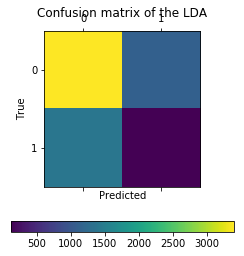

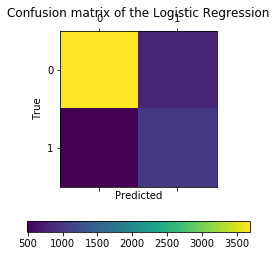

In [748]:
#Pocket Algorithm
plt.matshow(confusion_matrix(T_ts_p, y_pocket))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of the Pocket Algorithm')
plt.colorbar(orientation = 'horizontal')

#QDA
plt.matshow(confusion_matrix(T_ts_QDA_f, y_QDA))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of the QDA')
plt.colorbar(orientation = 'horizontal')

#LDA
plt.matshow(confusion_matrix(T_ts_QDA_f, y_LDA))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion matrix of the LDA')
plt.colorbar(orientation = 'horizontal')

#Logistic Regression
plt.matshow(confusion_matrix(T_ts_LR, y_LogReg))
plt.title('Confusion matrix of the Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.colorbar(orientation = 'horizontal')

### Discussions About Classificaion Model Comparison

So far I have applied all four Classification Models and evaluated varius metrics score. Lets review the scores once before to rank the classification models.


|**Models**    | **Accuracy** | **F1 Score** | **Precision** | **Recall** | **MCC** | **ROC-AUC** |
|--------------|--------------|--------------|---------------|------------|---------|-------------|
|Pocket        |    78.65%    |0.592         |0.777          |0.587       |0.311    |0.59         |
|QDA           |    65.85%    |0.602         |0.603          |0.631       |0.232    |0.63         |
|LDA           |    64.69%    |0.493         |0.494          |0.495       |-0.011   |0.49         |
|Logistic Reg  |    78.25%    |0.730         |0.720          |0.748       |0.467    |0.75         |

Ideally we choose the model which has a balance of all the scores. As I observed from the above table, **Logistic Regression** is looking very good as it has good accuracy, precision, recall and most importantingly the highest **ROC-AUC**. The higher the ROC-AUC, it tells degree of model capability of distinguishing between classes.An excellent model has AUC near to the 1 which means it has good measure of separability. A poor model has AUC near to the 0 which means it has worst measure of separability. In this model, LDA has the worst ROC-AUC. The reason behind this is because this adult income dataset is not well normally distributed. When I performed pre-processing and initial visualizations, it seemed to be skewed.

One of the other important measure to pick a classifier model is **F1 Score**, which is the harmonic mean of **Precison** and **Recall**. Again, **Logistic Regression** wins among all the other classifiers as it has highest F1 Score where LDA being the least effective with F1 score of 0.493.

The **MCC** is in essence a correlation coefficient between the observed and predicted binary classifications; it returns a value between −1 and +1. The higher the MCC score, the better our model is. So, LDA and QDA have MCC score of -0.011 and 0.232 repsectively, which means these models produce a lot of False Positives and False Negatives,whereas Logistic Regression has the highest MCC Score. **Pocket Algorithm** is also doing good as it has good accuracy, F1 Score, MCC score and higher ROC-AUC.

**_From the above discussion, we can conclude that Logistic Regression is best among all the models for this dataset while LDA and QDA are the last ones as this dataset was not normally distributed and was skewed. Pocket Algorithm was the second best for this dataset after Logistic Regression._**

# Conclusions

This was another interesing exercise like the previous ones and I learned a lot about CLassification Models. In this notebook, I was able to implement four of the most popular classification models that I learned. The dataset I picked was not one of the best one to honest especially for Gaussian Models like QDA and LDA. Hence the accuracy achieved for those models shows the importance of basic assumption ("_Dataset must be Gaussian or normally distributed_") that we make while applying these models to our dataset. This dataset required lot of pre-processing. I started with mapping classes to Binary Classifiers, then handling the missing values. This dataset had lot of categorical attributes with each of them having various unique values. Initially, I reduced the unique categories for each of the attribute followed by converting them to numerical attribute using get_dummies function. Next, I created a heatmap to understand the correlation and colinearity among the variables and reduced the features from 48 to 18. Lastly, I splitted the dataset into test and train for applying models.

It was great to understand the derivations and Linear Algebra behind these models before actually implementing them which helped me a lot during debugging of my code whenever I ran into issues. I started this exercise with Pocket Algorithm. I tried to implement the single perceptron model first and then tune it to Pocket Algorithm by storing the best weight vector. I tried this algorithm with both normalised and unnormalised data and noticed that it works better when the data is normalised which is actually the case with most of the machine learning algorithms.

For QDA and LDA models, the processed dataset still needed to be in the required order to be able to apply the model. This was one of the hard challenges that I faced in this exercise. I have explained how I splitted the dataset in QDA implementation of this notebook. I used the same dataset for both the models. Implementation of QDA and LDA was not very challenging. I just need to make sure that the matrix and vector are in the correct shapes and I apply the discriminant function correctly to my dataset.

Lastly, Logistic Regression with Softmax Transformation function was the best model out of the four classifier models that I implemented, which we proved as well using the Evaluation Metrices. The target variable for LR needed to be (N X K) shape which was the key difference of this algorithm. This model uses a softmax function which tweaks Logistic Regression to be able to used for Multi-class clsssification. This exercise provided many learning opportunities while debugging and fixing the errors that I encountered while implemenation of these models. I would like to conclude by saying that "Overall it was a good learning exercise and I look forward to upcoming machine learning assignments."

# Additional Analysis for Ordinal Datasets

I looked up for ordinal datasets and found "**Zero-Inflated Count Data for Frequency of a Side Effect**" which predicts 1 if the person is FEMALE and 0 if it is MALE based on SES values which are ordinal.

In [871]:
ordinal_dataset = pd.read_csv('ordinal_dataset_count_data_inflated.csv')
ordinal_dataset.shape

(708, 4)

In [870]:
ordinal_dataset.head()

,SESLOW,SESMED,FEXP,FEMALE
0,1,0,21,1
1,2,0,5,1
2,3,0,8,1
3,4,0,16,1
4,5,0,19,1


In this dataset, SESLOW and SESMED are ordinal attributes while FEXP is a continuous attribute. Let's find out unique values for these variables.

In [872]:
print("SESLOW : " ,ordinal_dataset.SESLOW.unique())
print("SESMED : " ,ordinal_dataset.SESMED.unique())

SESLOW :  [1 2 3 4 5 6]
SESMED :  [0 1 4 2 3 5 6]


In [873]:
#Seperate X and T

X_O = ordinal_dataset.iloc[:,:-1]
T_O = ordinal_dataset.iloc[:,-1:]

X_O.shape, T_O.shape

((708, 3), (708, 1))

In [874]:
X_O = ordinal_dataset.iloc[:,:-1]
T_O = ordinal_dataset.iloc[:,-1:]

X_O.shape, T_O.shape

((708, 3), (708, 1))

In [907]:
#partition the dataset

X_train, X_test, T_train, T_test = partition(X_O, T_O, train_ratio=0.75)

X_train.shape, X_test.shape, T_train.shape, T_test.shape

((531, 3), (177, 3), (531, 1), (177, 1))

In [912]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
T_train = T_train.reset_index(drop=True)
T_test = T_test.reset_index(drop=True)

In [913]:
train = copy(T_train)
test = copy(T_test)

In [914]:
#replace 0 with -1 for pocket algorithm
train['FEMALE'].replace(0, -1, inplace = True)
test['FEMALE'].replace(0, -1, inplace = True)

In [915]:
# Apply Pocket Algorithm

pocket_ordinal = PocketClassifier(0.002)
pocket_ordinal.train(X_train.values, train.values)
y_pocket_ordinal = pocket_ordinal.use(X_test.values)

In [916]:
y_pocket_ordinal = np.where(y_pocket_ordinal < 0, 0, 1)

In [917]:
confusion_matrix(T_test, y_pocket_ordinal)

array([[ 0, 91],
       [ 0, 86]], dtype=int64)

In [918]:
print("Accuracy:", round((accuracy_score(T_test,y_pocket_ordinal)*100),2), "%")
print("F1 Score: ",round(f1_score(T_test, y_pocket_ordinal, average="macro"),3))
print("Precision: ",round(precision_score(T_test, y_pocket_ordinal, average="macro"),3))
print("Recall: ",round(recall_score(T_test, y_pocket_ordinal, average="macro"),3))
print("MCC:", round(matthews_corrcoef(T_test,y_pocket_ordinal),3))
fpr, tpr, threshold = roc_curve(T_test ,y_pocket_ordinal)
print("ROC-AUC:",round(auc(fpr, tpr),2))

Accuracy: 48.59 %
F1 Score:  0.327
Precision:  0.243
Recall:  0.5
MCC: 0.0
ROC-AUC: 0.5


In [919]:
#prepare data for QDA and LDA

X_QDA_Ordinal = pd.concat([X_train, T_train], axis=1)
X1_O, X2_O = DatasetSplit(X_QDA_Ordinal, 'FEMALE')
X_QDA_Ordinal = pd.concat([X1_O, X2_O])
X_QDA_Ordinal = X_QDA_Ordinal.iloc[:,:-1]

Z1 = X1_O.shape[0]
Z2 = X2_O.shape[0]

X_QDA_Ordinal.shape, Z1, Z2

((531, 3), 263, 268)

In [920]:
#Apply QDA

qda_ordinal = QDA()
qda_ordinal.train(X_QDA_Ordinal, Z1, Z2)
y_QDA_ordinal = qda_ordinal.use(X_test)

In [921]:
confusion_matrix(T_test, y_QDA_ordinal)

array([[91,  0],
       [86,  0]], dtype=int64)

In [922]:
print("Accuracy:", round((accuracy_score(T_test,y_QDA_ordinal)*100),2), "%")
print("F1 Score: ",round(f1_score(T_test, y_QDA_ordinal, average="macro"),3))
print("Precision: ",round(precision_score(T_test, y_QDA_ordinal, average="macro"),3))
print("Recall: ",round(recall_score(T_test, y_QDA_ordinal, average="macro"),3))
print("MCC:", round(matthews_corrcoef(T_test,y_QDA_ordinal),3))
fpr, tpr, threshold = roc_curve(T_test ,y_QDA_ordinal)
print("ROC-AUC:",round(auc(fpr, tpr),2))

Accuracy: 51.41 %
F1 Score:  0.34
Precision:  0.257
Recall:  0.5
MCC: 0.0
ROC-AUC: 0.5


In [923]:
#Apply LDA

#using same dataset prepared for QDA

lda_ordinal = LDA()
lda_ordinal.train(X_QDA_Ordinal, Z1, Z2)
y_LDA_ordinal = lda_ordinal.use(X_test)

In [924]:
confusion_matrix(T_test, y_LDA_ordinal)

array([[52, 39],
       [41, 45]], dtype=int64)

In [925]:
print("Accuracy:", round((accuracy_score(T_test,y_LDA_ordinal)*100),2), "%")
print("F1 Score: ",round(f1_score(T_test, y_LDA_ordinal, average="macro"),3))
print("Precision: ",round(precision_score(T_test, y_LDA_ordinal, average="macro"),3))
print("Recall: ",round(recall_score(T_test, y_LDA_ordinal, average="macro"),3))
print("MCC:", round(matthews_corrcoef(T_test,y_LDA_ordinal),3))
fpr, tpr, threshold = roc_curve(T_test ,y_LDA_ordinal)
print("ROC-AUC:",round(auc(fpr, tpr),2))

Accuracy: 54.8 %
F1 Score:  0.547
Precision:  0.547
Recall:  0.547
MCC: 0.095
ROC-AUC: 0.55


In [926]:
T_train_LR = pd.get_dummies(T_train['FEMALE'])
T_train_LR.shape

(531, 2)

In [927]:
#Apply Logistic Regression

logistic_ordinal = LogisticRegression(0.005)
logistic_ordinal.train(X_train, T_train_LR)
y_log_ordinal = logistic_ordinal.use(X_test)

In [928]:
confusion_matrix(T_test, y_log_ordinal)

array([[91,  0],
       [86,  0]], dtype=int64)

In [929]:
print("Accuracy:", round((accuracy_score(T_test,y_log_ordinal)*100),2), "%")
print("F1 Score: ",round(f1_score(T_test, y_log_ordinal, average="macro"),3))
print("Precision: ",round(precision_score(T_test, y_log_ordinal, average="macro"),3))
print("Recall: ",round(recall_score(T_test, y_log_ordinal, average="macro"),3))
print("MCC:", round(matthews_corrcoef(T_test,y_log_ordinal),3))
fpr, tpr, threshold = roc_curve(T_test ,y_log_ordinal)
print("ROC-AUC:",round(auc(fpr, tpr),2))

Accuracy: 51.41 %
F1 Score:  0.34
Precision:  0.257
Recall:  0.5
MCC: 0.0
ROC-AUC: 0.5


### Results for Ordinal Dataset

I used a simple ordinal dataset without any preprocessing to test out the classification models that I implemented earlier. I have shown my experiments for this dataset in the previous section. I applied all the 4 classification models to this ordinal data and here is the summary of metrics of produced by these models:

|**Models**    | **Accuracy** | **F1 Score** | **Precision** | **Recall** | **MCC** | **ROC-AUC** |
|--------------|--------------|--------------|---------------|------------|---------|-------------|
|Pocket        |    44.63%    |0.309         |0.223          |0.500       |0.0      |0.50         |
|QDA           |    50.85%    |0.337         |0.254          |0.500       |0.0      |0.50         |
|LDA           |    53.11%    |0.483         |0.540          |0.526       |0.065    |0.50         |
|Logistic Reg  |    51.41%    |0.350         |0.756          |0.506       |0.077    |0.51         |

* Logistic Regression and LDA are slightly better for the ordinal dataset compared to pocket classifier and QDA. 

* **Yes, the results achieved for Ordinal Dataset are very different from the results I achieved for my Adult Income dataset that consisted of Continuous and Categorical Data.** The accuracies, F1 score, MCC score, ROC-AUC score is very less for all the models when ran on an ordinal dataset comapred to when they were run on a nominal dataset.

# References

Ron Kohavi, "Scaling Up the Accuracy of Naive-Bayes Classifiers: a Decision-Tree Hybrid", Proceedings of the Second International Conference on Knowledge Discovery and Data Mining, 1996,
https://archive.ics.uci.edu/ml/datasets/Adult

Hunter, J. D. "Matplotlib: A 2D graphics environment",Computing In Science \& Engineering, IEEE COMPUTER SOC, 9, 90-95 (2007),
https://matplotlib.org/tutorials/introductory/sample_plots.html

Travis E, Oliphant. A guide to NumPy, USA: Trelgol Publishing, (2006),
http://www.numpy.org/

Wes McKinney. Data Structures for Statistical Computing in Python, Proceedings of the 9th Python in Science Conference, 51-56 (2010),
http://pandas.pydata.org/pandas-docs/version/0.15.2/generated/pandas.DataFrame.replace.html

"Perceptron”: From Wikipedia, the free encyclopedia, from
https://en.wikipedia.org/wiki/Perceptron 

"Confusion Matrix”: From Wikipedia, the free encyclopedia, from                                                            
https://en.wikipedia.org/wiki/Confusion_matrix

"Choosing the Right Metric for Evaluating Machine Learning Models — Part 2": From Medium, from 
https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428
   
Aurélien Géron, "_Hands on Machine learning with scikit learn and Tensorflow_", O'Reilly Media, 2017